# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [40]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [99]:
df.dropna(subset=["AVG_MATH_8_SCORE"], inplace = True)
df.dropna(subset=["AVG_READING_8_SCORE"], inplace = True)
df.dropna(subset=["INSTRUCTION_EXPENDITURE"], inplace = True)
df.dropna(subset=["SUPPORT_SERVICES_EXPENDITURE"], inplace = True)
df.dropna(subset=["TOTAL_REVENUE"], inplace = True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: **Grade 8 Math**

How many years of data are logged in our dataset? 

In [20]:
print(df["YEAR"].nunique())

# 33 Years

33


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [19]:
print("Michigan, Grade 8 Math Average: ", df.groupby("STATE")["AVG_MATH_8_SCORE"].mean()["MICHIGAN"])
print("Ohio, Grade 8 Math Average: " , df.groupby("STATE")["AVG_MATH_8_SCORE"].mean()["OHIO"])

# Ohio has the higher average across all years in Grade 8 Math.

Michigan, Grade 8 Math Average:  276.1666666666667
Ohio, Grade 8 Math Average:  282.25


Find the average for your chosen test across all states in 2019

In [22]:
print(df[df["YEAR"] == 2019]["AVG_MATH_8_SCORE"].mean())

# Average Grade 8 Math score across all states in 2019 is 281.2641509433962.

281.2641509433962


For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [23]:
print(df.groupby("STATE")["AVG_MATH_8_SCORE"].max())


STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [60]:


df["EXPENSE_to_REVENUE"] = df["INSTRUCTION_EXPENDITURE"] / df["TOTAL_REVENUE"]
df["SUPPORT_to_REVENUE"] = df["SUPPORT_SERVICES_EXPENDITURE"] / df["TOTAL_REVENUE"]

Feature engineering justification: I created an "EXPENSE_to_REVENUE" column to see if there is an effect on the Grade 8 Math scores.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0.5, 1.0, 'AVG_MATH_8_SCORE to the Ratio of INSTRUCTION_EXPENDITURE to TOTAL_REVENUE')

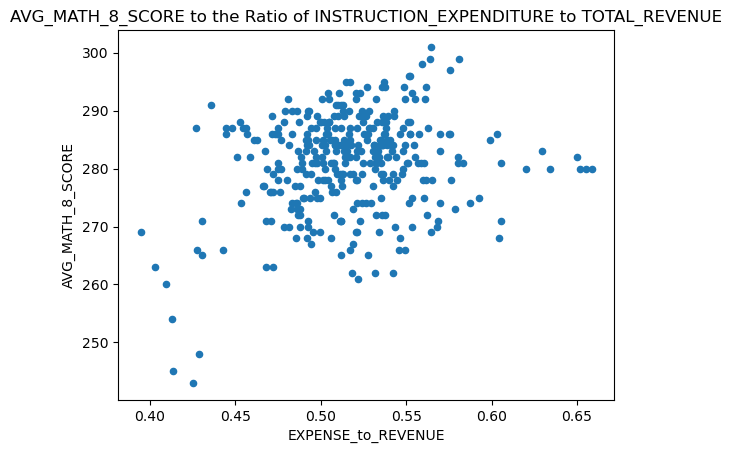

In [56]:
df.plot.scatter(x = "EXPENSE_to_REVENUE", y = "AVG_MATH_8_SCORE")

plt.title("AVG_MATH_8_SCORE to the Ratio of INSTRUCTION_EXPENDITURE to TOTAL_REVENUE")

AVG_MATH_8_SCORE to the Ratio of INSTRUCTION_EXPENDITURE to TOTAL_REVENUE. The results are barely linearly correlated.

**Visualization 2**

Text(0.5, 1.0, 'AVG_MATH_8_SCORE vs INSTRUCTION_EXPENDITURE')

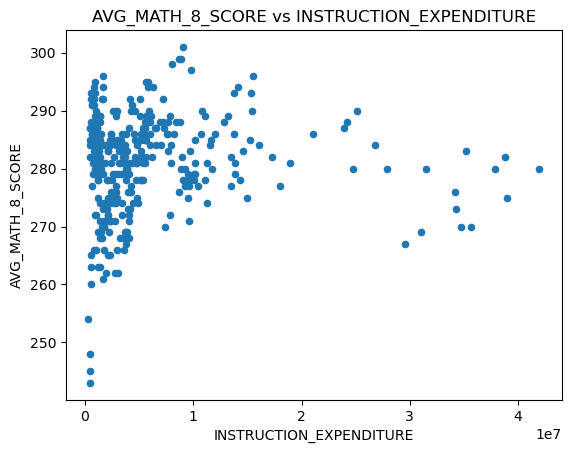

In [57]:
df.plot.scatter(x = "INSTRUCTION_EXPENDITURE", y = "AVG_MATH_8_SCORE")
plt.title("AVG_MATH_8_SCORE vs INSTRUCTION_EXPENDITURE")

AVG_MATH_8_SCORE vs INSTRUCTION_EXPENDITURE, this visualization is to supplement the the visualization above. Again, the larger instruction expenditure does not have a strong linear correlation with the average 8th grade math scores. However, if the state provides less instruction expenditure, the lowest average score is shown there.

**Visualization 3**

Text(0.5, 1.0, 'AVG_MATH_8_SCORE vs AVG_READING_8_SCORE')

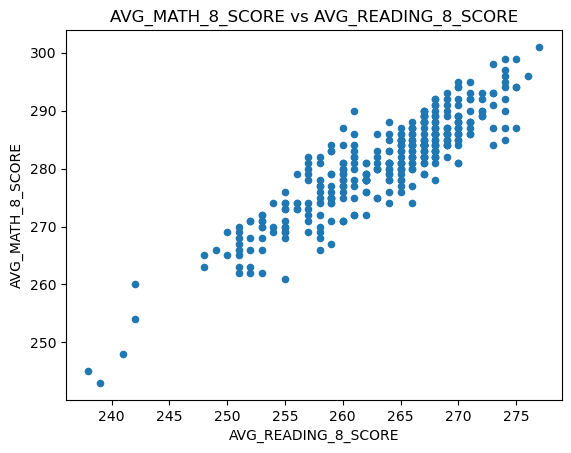

In [55]:
df.plot.scatter(x = "AVG_READING_8_SCORE", y = "AVG_MATH_8_SCORE")
plt.title("AVG_MATH_8_SCORE vs AVG_READING_8_SCORE")

AVG_MATH_8_SCORE vs AVG_READING_8_SCORE, an extra visualization. I wanted to see if there is a strong linear correlation here, and there definitely is. Higher the math score, indicates a higher reading score as well.

Text(0.5, 1.0, 'AVG_MATH_8_SCORE to the Ratio of SUPPORT_EXPENDITURE to TOTAL_REVENUE')

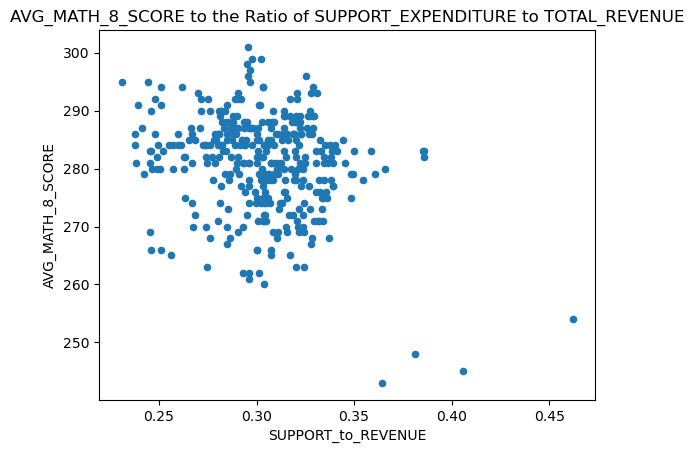

In [61]:
df.plot.scatter(x = "SUPPORT_to_REVENUE", y = "AVG_MATH_8_SCORE")

plt.title("AVG_MATH_8_SCORE to the Ratio of SUPPORT_EXPENDITURE to TOTAL_REVENUE")

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [58]:
from sklearn.model_selection import train_test_split

In [63]:
# X =
# y = 

X = df[['EXPENSE_to_REVENUE','AVG_READING_8_SCORE','TOTAL_REVENUE']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [88]:
# We also need to make sure there is no NaN in y
# This time, we will fill the NaN with the median of y 

y.fillna(y.median(), inplace=True)

# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)


<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [89]:
# import your sklearn class here

from sklearn.linear_model import LinearRegression

In [90]:
# create your model here
# model = 

model = LinearRegression()

In [91]:
model.fit(X_train, y_train)

LinearRegression()

In [97]:
y_pred = model.predict(X_test)

print(model.intercept_)
print(model.coef_)
print(model.score(X_test, y_test))
print(np.mean(model.predict(X_test)-y_test))

-19.639406920886756
[-1.36759406e+01  1.16775099e+00  1.46560742e-08]
0.8030222808549611
1.0217009210178947



## Evaluation


Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

Evaluation: I choose mean error to evaluate the performance of my model, which yielded a 1.0217009210178947. I believe that the model performed quite well overall.

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

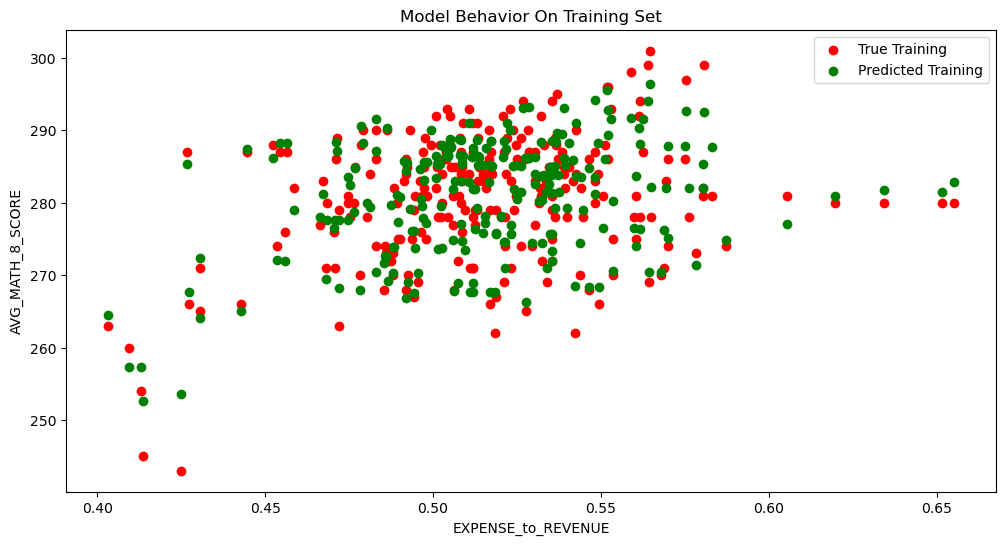

In [93]:
# col_name = 'COLUMN NAME OF ONE PREDICTOR'

# f = plt.figure(figsize=(12,6))
# plt.scatter(X_train[col_name], y_train, color = "red")
# plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

# plt.legend(['True Training','Predicted Training'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior On Training Set")

col_name = 'EXPENSE_to_REVENUE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior On Training Set')

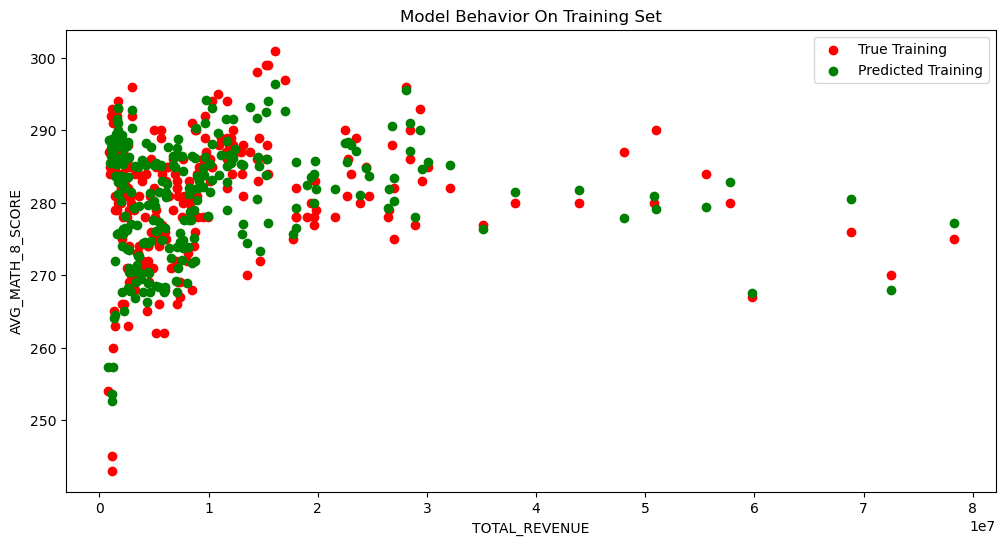

In [94]:
# col_name = 'COLUMN NAME OF ONE PREDICTOR"

# f = plt.figure(figsize=(12,6))
# plt.scatter(X_test[col_name], y_test, color = "blue")
# plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

# plt.legend(['True testing','Predicted testing'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior on Testing Set")

col_name = 'TOTAL_REVENUE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior On Training Set')

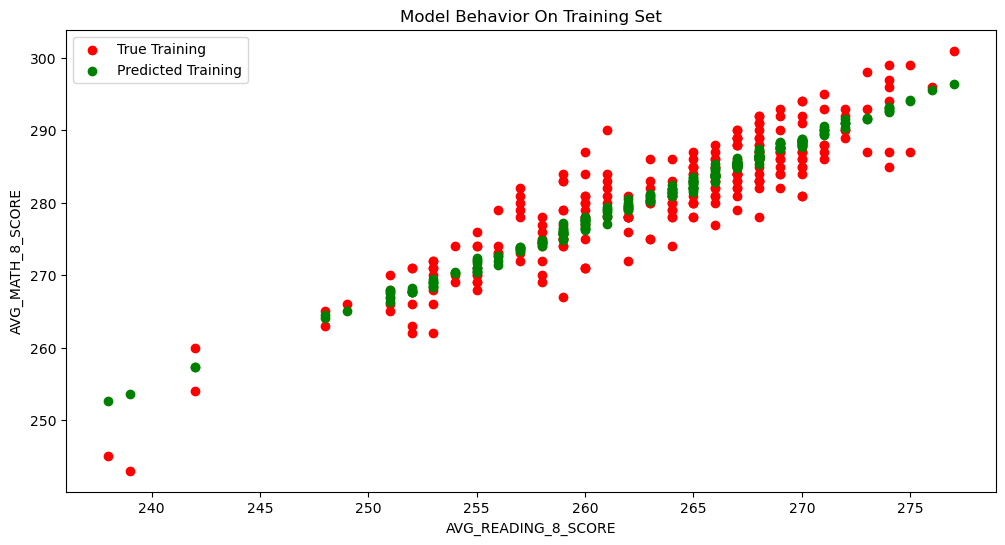

In [95]:
# col_name = 'COLUMN NAME OF ONE PREDICTOR"

# f = plt.figure(figsize=(12,6))
# plt.scatter(X_test[col_name], y_test, color = "blue")
# plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

# plt.legend(['True testing','Predicted testing'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior on Testing Set")

col_name = 'AVG_READING_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior On Training Set")

<h2> Summary </h2>

I created an column 'EXPENSE_to_REVENUE' that took the ratio of 'INSTRUCTION_EXPENDITURE' to 'TOTAL_REVENUE.' I choose to add this column because I thought it would provide insights whether if the state prioritize spending on education would show a correlation to the average 8th grade math scores. In the visualizations shown above, 'AVG_MATH_8_SCORE to the Ratio of INSTRUCTION_EXPENDITURE to TOTAL_REVENUE'. I would assume the higher the ratio, the higher the score because a higher ratio may indicate the state's priorities in spending for instruction. Even though the correlation is not exactly linear, my hypothesis do hold some weight as the lower ratios do result in the lowest average scores (bottom left of the graph indicates). Only the lower ratios (less than 0.45) contain scores below 250. I did notice that there seem to be a threshold ratio (0.50 to 0.55) where the majority of the scores seem to be correlated to the ratio at all. Between the scores of 260 to 290, where majority of the scores are, there shows very little linear correlation here. 

I used 'EXPENSE_to_REVENUE','AVG_READING_8_SCORE', and 'TOTAL_REVENUE' as my predictors for my machine learning model. I choose'EXPENSE_to_REVENUE' and 'TOTAL_REVENUE' because I thought these would be interesting predictors to look at. I choose 'AVG_READING_8_SCORE' as the relationship is already strongly linearly correlated. I choose 70 to train / 30 to test and 50 to train / 50 to test to see the results. The model predicted very similarly, regardless of the test_size parameter. 